# Import all required frameworks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create data with random numbers

In [2]:
np.random.seed(42)
X = np.random.rand(100,1)-0.5
Y = 3*X[:,0]**2 +0.05 * np.random.randn(100)

In [3]:
df= pd.DataFrame()
df['X']= X.reshape(100)
df['Y'] =Y
df

,X,Y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

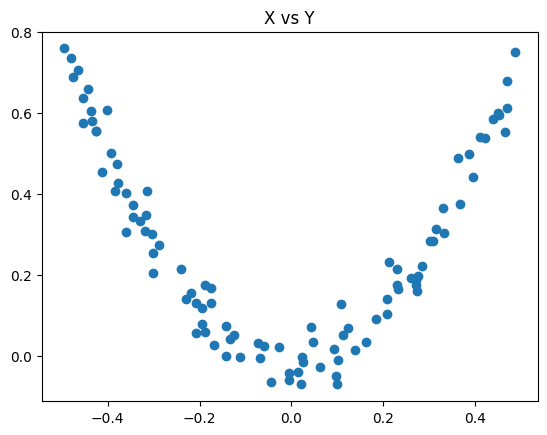

In [4]:
plt.scatter(df['X'], df['Y'])
plt.title('X vs Y')

# Step 1: M1 (gives predictions as mean of target values)

In [5]:
df['pred1'] = df['Y'].mean()

In [6]:
df

,X,Y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


## Pseudo Residuals = Diff between target and actual variables

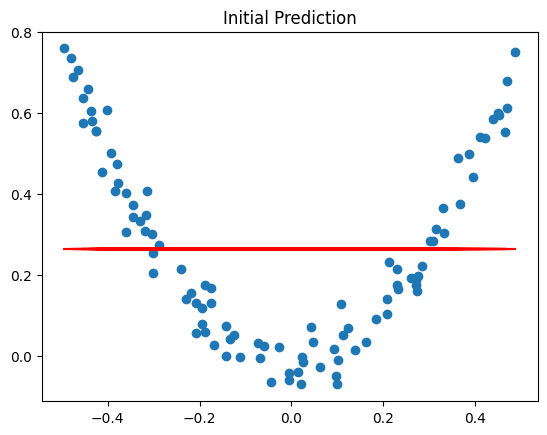

In [8]:
df['res1'] = df['Y'] - df['pred1']

plt.scatter(df['X'], df['Y'])
plt.plot(df['X'], df['pred1'], color='red')
plt.title('Initial Prediction')
plt.show()

In [12]:
df

,X,Y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


The target of Decision Tree(M2) is res1 (residuals of the previous predictor)

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [11]:
tree1.fit(df['X'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.29545454545454547, 0.8333333333333333, 'True  '),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.5227272727272727, 0.8333333333333333, '  False'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453

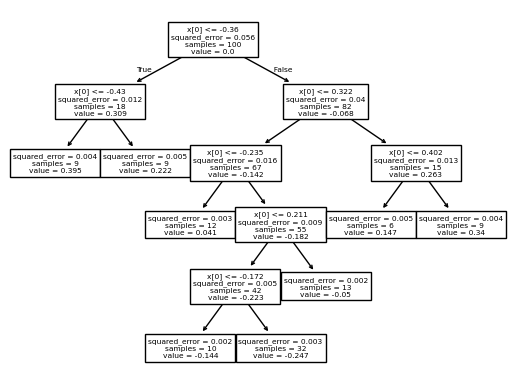

In [13]:
from sklearn.tree import plot_tree
plot_tree(tree1)

In [14]:
# Generating Test set
X_test = np.linspace(-0.5,0.5,500)

In [ ]:
# y_pred = M1(mean)+ learning rate * M2
# For now taking learning rate= 1
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1))

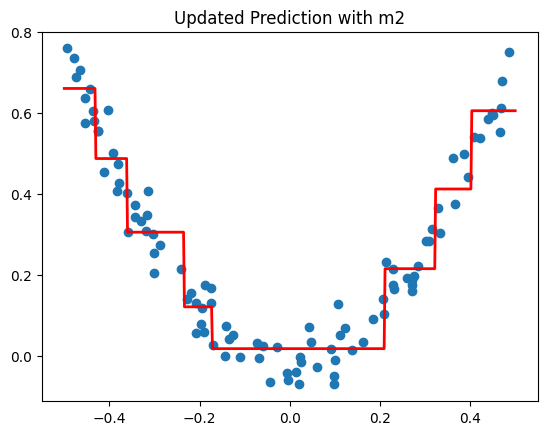

In [18]:
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['Y'])
plt.title('Updated Prediction with m2')
plt.show()

In [19]:
df['pred2'] = 0.265458 +tree1.predict(df['X'].values.reshape(100,1))

In [20]:
df

,X,Y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [21]:
df['res2'] = df['Y'] - df['pred2']
df

,X,Y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In model  (M3), res2 is target value of given decision tree

In [22]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [24]:
tree2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
# y_pred = M1(mean)+ learning rate * M2 +  learning rate * M3 
# For now taking learning rate= 1
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1, tree2])

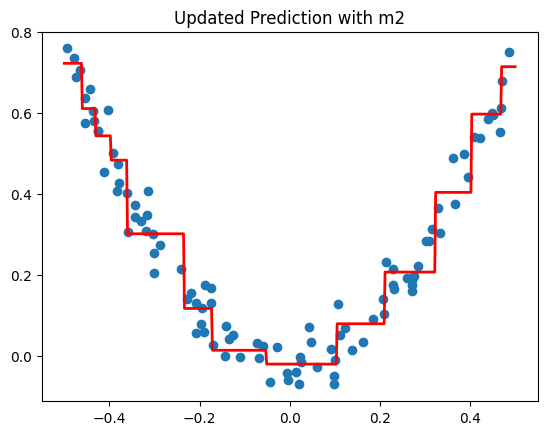

In [27]:
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['Y'])
plt.title('Updated Prediction with m2')
plt.show()

Conclusion: Here, we have intensionally used 3 models:
- M1 -> mean of target
- M2 -> target is res1
- M3 -> target is res2